# `Observing Impact: Mode of Work & Employee Benefits `


#**BUSINESS PROBLEM 1** : Remote Work Collection System Analysis

Understanding and managing the distribution of work modes across the organization workforce to optimize space, resources, and HR policies
Understand the impact of remote work on employee productivity, satisfaction, and overall organizational performance.
Analyze the effectiveness of the new remote work policy and identify areas for improvement.


In [47]:
# Import libraries
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, ttest_ind
from sklearn.linear_model import LinearRegression

SAMPLE DATA

This dataset contains information on work modes, performance, and employee satisfaction.

| **Column**           | **Description**                                                                  | **Data Type** | **Example Values**      |
|-----------------------|----------------------------------------------------------------------------------|---------------|--------------------------|
| `EmployeeID`          | Unique identifier for each employee.                                             | Integer       | 1, 2, 3                  |
| `WorkMode`            | Employee's primary work mode (Remote, Hybrid, or Onsite).                        | Categorical   | Remote, Hybrid, Onsite   |
| `RemoteDaysPerWeek`   | Number of days per week an employee works remotely.                              | Integer       | 1, 3, 4                  |
| `PerformanceScore`    | Employee's performance score (scaled 50-100).                                    | Integer       | 70, 88, 95               |
| `SatisfactionScore`   | Employee's satisfaction score (scaled 60-100).                                   | Integer       | 72, 85, 91               |
| `Department`          | Department in which the employee works.                                          | Categorical   | Admin, Faculty, IT, HR   |
| `Location`            | Employee's work location.                                                        | Categorical   | Canton, Ann Arbor        |
| `Tenure`              | Number of years the employee has been with the organization.                     | Integer       | 3, 7, 15                 |

In [23]:
np.random.seed(42)


work_modes_data = pd.DataFrame({
    'EmployeeID': range(1, 501),
    'WorkMode': np.random.choice(['Remote', 'Hybrid', 'Onsite'], size=500, p=[0.3, 0.5, 0.2]),
    'RemoteDaysPerWeek': np.random.randint(1, 5, 500), #assuming even onsite employees can get one day as remote privilege
    'PerformanceScore': np.random.randint(50, 100, 500),
    'SatisfactionScore': np.random.randint(60, 100, 500),
    'Department': np.random.choice(['Admin', 'Faculty', 'IT', 'HR'], size=500),
    'Location': np.random.choice(['Canton', 'Ann Arbor'], size=500, p=[0.7, 0.3]),
    'Tenure': np.random.randint(1, 20, 500)
})

In [24]:
work_modes_data.shape

(500, 8)

In [25]:
work_modes_data.head()

,EmployeeID,WorkMode,RemoteDaysPerWeek,PerformanceScore,SatisfactionScore,Department,Location,Tenure
0,1,Hybrid,2,55,77,Faculty,Canton,17
1,2,Onsite,3,55,96,Admin,Canton,9
2,3,Hybrid,1,52,84,Faculty,Canton,1
3,4,Hybrid,1,56,60,Faculty,Canton,14
4,5,Remote,1,57,74,HR,Canton,11


#Exploratory Data Analysis

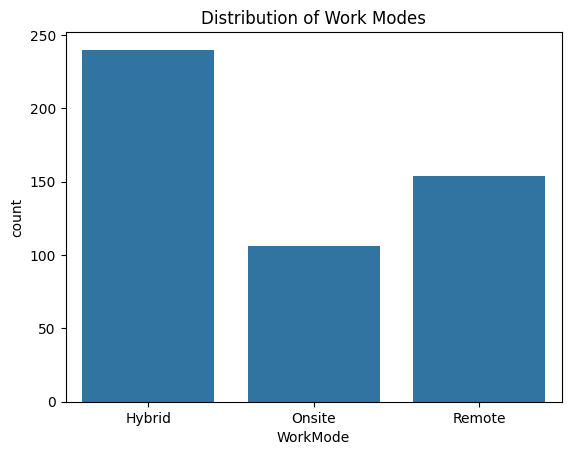

In [26]:

sns.countplot(data=work_modes_data, x='WorkMode')
plt.title('Distribution of Work Modes')
plt.show()

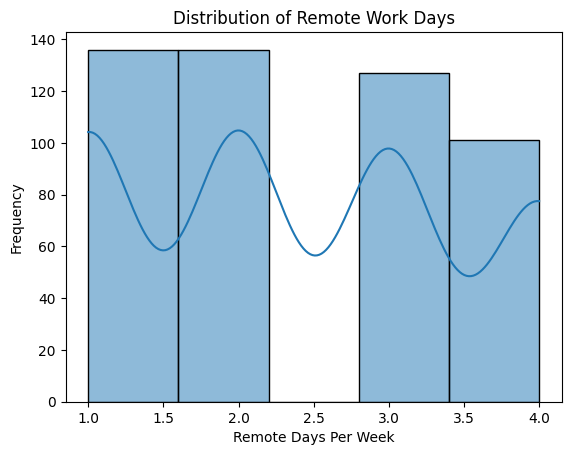

In [39]:
sns.histplot(work_modes_data['RemoteDaysPerWeek'], kde=True, bins=5)
plt.title('Distribution of Remote Work Days')
plt.xlabel('Remote Days Per Week')
plt.ylabel('Frequency')
plt.show()

<ipython-input-80-b4eef7073358>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=work_modes_data, x='WorkMode', y='PerformanceScore', palette='Set2')


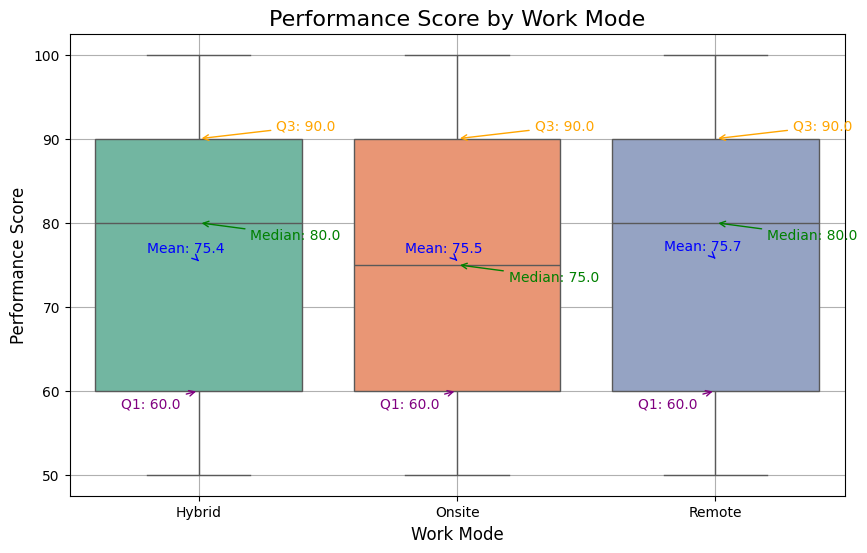

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=work_modes_data, x='WorkMode', y='PerformanceScore', palette='Set2')


for i, work_mode in enumerate(work_modes_data['WorkMode'].unique()):

    data = work_modes_data[work_modes_data['WorkMode'] == work_mode]['PerformanceScore']


    mean = np.mean(data)
    q1 = np.percentile(data, 25)
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)


    x = i


    ax.annotate(f'Mean: {mean:.1f}', xy=(x, mean), xytext=(x - 0.2, mean + 1),
                arrowprops=dict(arrowstyle='->', color='blue'), color='blue')
    ax.annotate(f'Median: {median:.1f}', xy=(x, median), xytext=(x + 0.2, median - 2),
                arrowprops=dict(arrowstyle='->', color='green'), color='green')
    ax.annotate(f'Q1: {q1:.1f}', xy=(x, q1), xytext=(x - 0.3, q1 - 2),
                arrowprops=dict(arrowstyle='->', color='purple'), color='purple')
    ax.annotate(f'Q3: {q3:.1f}', xy=(x, q3), xytext=(x + 0.3, q3 + 1),
                arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

# Customize the plot
plt.title('Performance Score by Work Mode', fontsize=16)
plt.xlabel('Work Mode', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.grid(True)
plt.show()

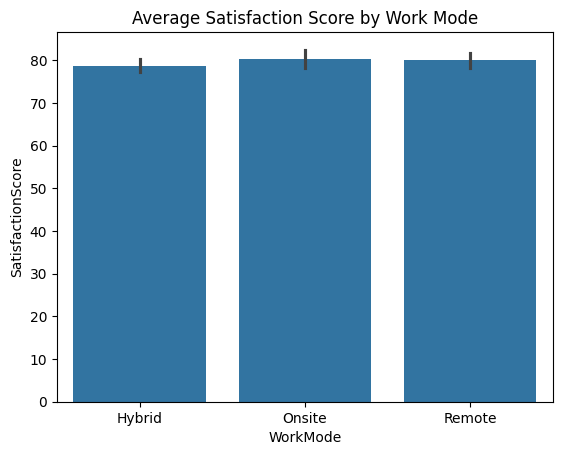

In [53]:
sns.barplot(data=work_modes_data, x='WorkMode', y='SatisfactionScore')
plt.title('Average Satisfaction Score by Work Mode')
plt.show()


Differential Privacy: Adding noise to the sensitive fields

In [40]:
work_modes_data['PerformanceScore'] = work_modes_data['PerformanceScore'].apply(lambda x: round(x/10)*10)


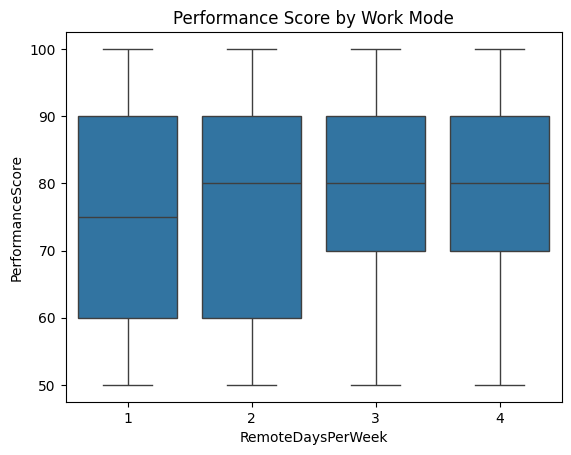

In [42]:
sns.boxplot(data=work_modes_data, x='RemoteDaysPerWeek', y='PerformanceScore')
plt.title('Performance Score by Work Mode')
plt.show()


In [45]:
correlation = work_modes_data[['RemoteDaysPerWeek', 'PerformanceScore']].corr()
print(correlation)


                   RemoteDaysPerWeek  PerformanceScore
RemoteDaysPerWeek           1.000000          0.059845
PerformanceScore            0.059845          1.000000


In [50]:
X = work_modes_data[['RemoteDaysPerWeek', 'Tenure']]
y = work_modes_data['PerformanceScore']

model = LinearRegression().fit(X, y)
print(f"R-squared: {model.score(X, y)}")


R-squared: 0.003773626629400062


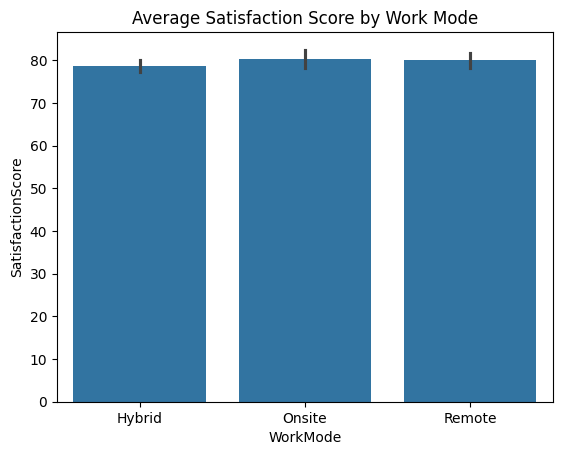

Compare performance accross work modes

In [81]:
anova_result = f_oneway(
    work_modes_data[work_modes_data['WorkMode'] == 'Remote']['PerformanceScore'],
    work_modes_data[work_modes_data['WorkMode'] == 'Hybrid']['PerformanceScore'],
    work_modes_data[work_modes_data['WorkMode'] == 'Onsite']['PerformanceScore']
)

print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA p-value: 0.9800176647569524


<ipython-input-85-3829b5c7b276>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


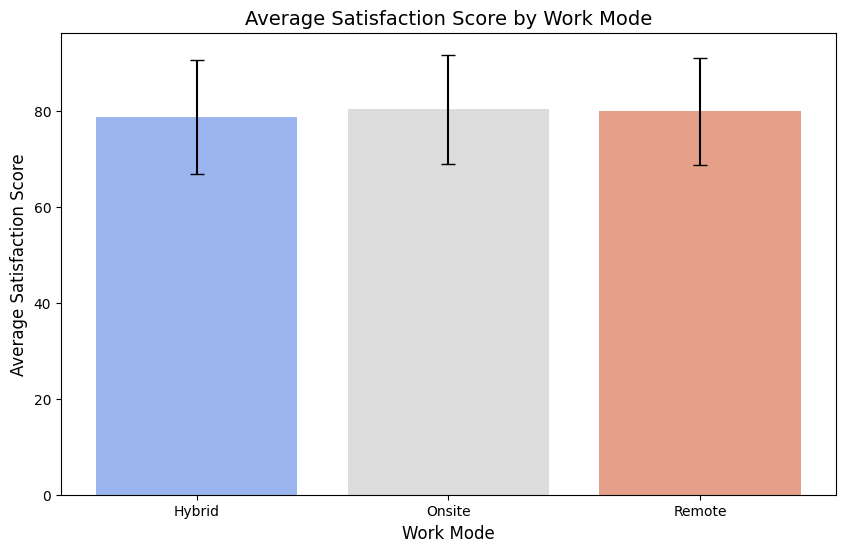

In [85]:

satisfaction_summary = work_modes_data.groupby('WorkMode')['SatisfactionScore'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))

sns.barplot(
    data=satisfaction_summary,
    x='WorkMode',
    y='mean',
    palette='coolwarm'
)

for i in range(len(satisfaction_summary)):
    plt.errorbar(
        x=i,
        y=satisfaction_summary['mean'][i],
        yerr=satisfaction_summary['std'][i],
        fmt='none',
        color='black',
        capsize=5
    )

plt.title('Average Satisfaction Score by Work Mode', fontsize=14)
plt.xlabel('Work Mode', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)


plt.show()


#Business Problem 2: Observing affect of benefit utilizaion on employee satisfaction

Employee benefits, particularly healthcare, significantly impact satisfaction, productivity, and retention.
The organization needs integrated benefits and HR data for actionable insights while maintaining strict privacy and security.
Key goals include:
Understanding benefit utilization across demographics, job types, and locations.
Identifying patterns to enhance benefits offerings and policies.




Dataset captures employee benefits data, including healthcare utilization, job type, and satisfaction scores.

| **Column**           | **Description**                                                                 | **Data Type** | **Example Values**      |
|-----------------------|---------------------------------------------------------------------------------|---------------|--------------------------|
| `EmployeeID`          | Unique identifier for each employee.                                            | Integer       | 1, 2, 3                  |
| `HealthCareUtilization` | Number of healthcare services utilized in a year.                              | Integer       | 3, 12, 7                 |
| `SatisfactionScore`   | Employee's satisfaction score (scaled 50-100).                                  | Integer       | 55, 78, 93               |
| `JobType`             | Type of job (Faculty or Staff).                                                 | Categorical   | Faculty, Staff           |
| `AgeGroup`            | Age bracket of the employee.                                                    | Categorical   | <25, 25-34, 35-44        |
| `Gender`              | Gender identity of the employee.                                                | Categorical   | Male, Female, Non-Binary |
| `Location`            | Primary work location.                                                          | Categorical   | Ann Arbor, Canton        |


In [70]:
benefits_data = pd.DataFrame({
    'EmployeeID': range(1, 501),
    'HealthCareUtilization': np.random.randint(1, 20, 500),
    'SatisfactionScore': np.random.randint(50, 100, 500),
    'JobType': np.random.choice(['Faculty', 'Staff'], size=500, p=[0.6, 0.4]),
    'AgeGroup': np.random.choice(['<25', '25-34', '35-44', '45-54', '55+'], size=500),
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary'], size=500),
    'Location': np.random.choice(['Ann Arbor', 'Canton'], size=500, p=[0.7, 0.3]),
})

In [71]:
benefits_data.shape

(500, 7)

In [72]:
benefits_data.head()

,EmployeeID,HealthCareUtilization,SatisfactionScore,JobType,AgeGroup,Gender,Location
0,1,13,95,Faculty,25-34,Female,Ann Arbor
1,2,7,75,Faculty,45-54,Male,Canton
2,3,10,70,Staff,<25,Male,Canton
3,4,13,94,Faculty,25-34,Non-Binary,Canton
4,5,16,75,Staff,25-34,Female,Ann Arbor


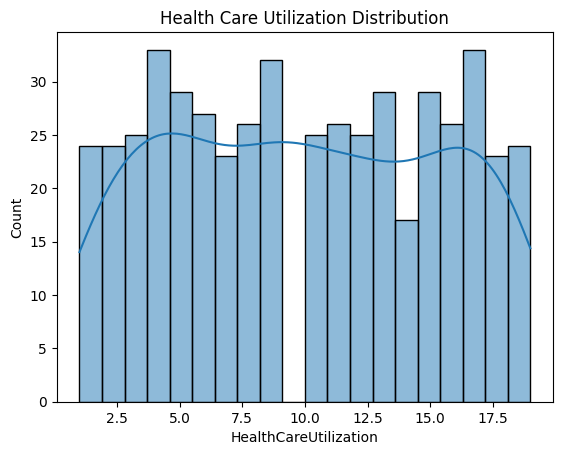

In [35]:
sns.histplot(benefits_data['HealthCareUtilization'], bins=20, kde=True)
plt.title('Health Care Utilization Distribution')
plt.show()

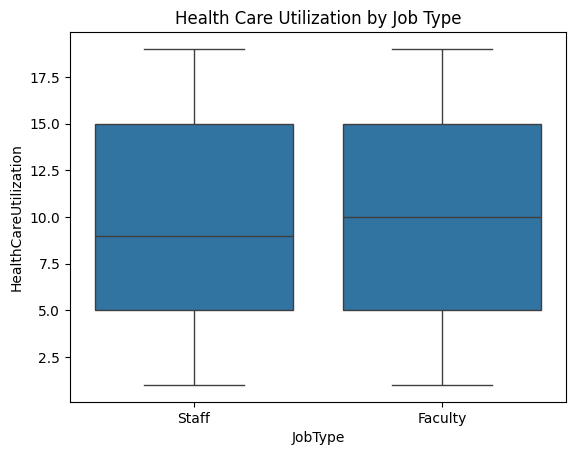

In [36]:
sns.boxplot(data=benefits_data, x='JobType', y='HealthCareUtilization')
plt.title('Health Care Utilization by Job Type')
plt.show()

#Visualization 1: Benefits Utilization by Demographics



In [37]:
# Aggregation to preserve privacy
benefits_data['AgeGroup'] = benefits_data['AgeGroup'].replace({'<25': '<35', '25-34': '<35'})

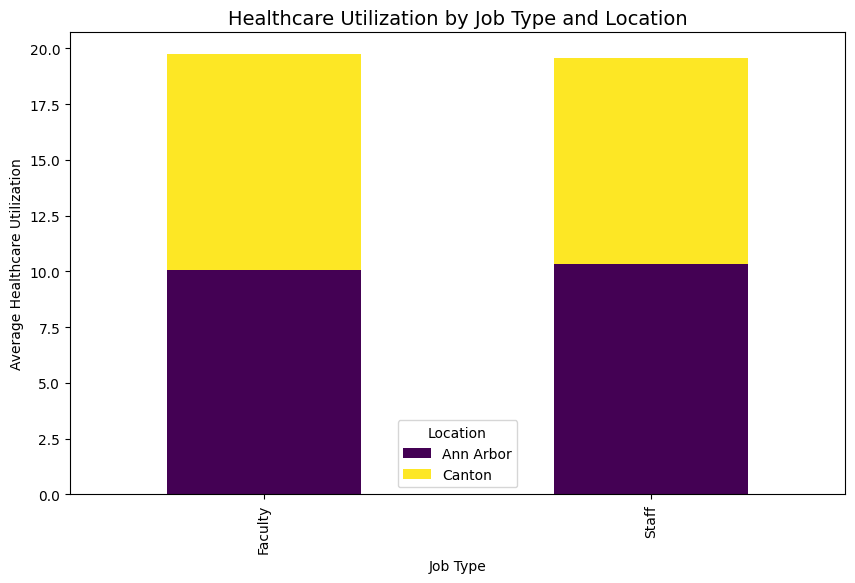

In [73]:

utilization_by_jobtype = benefits_data.groupby(['JobType', 'Location'])['HealthCareUtilization'].mean().unstack()


utilization_by_jobtype.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Healthcare Utilization by Job Type and Location', fontsize=14)
plt.xlabel('Job Type')
plt.ylabel('Average Healthcare Utilization')
plt.legend(title='Location')
plt.show()



#Heat Map to show the co-relation between health care plan utilization and the gender and age group.

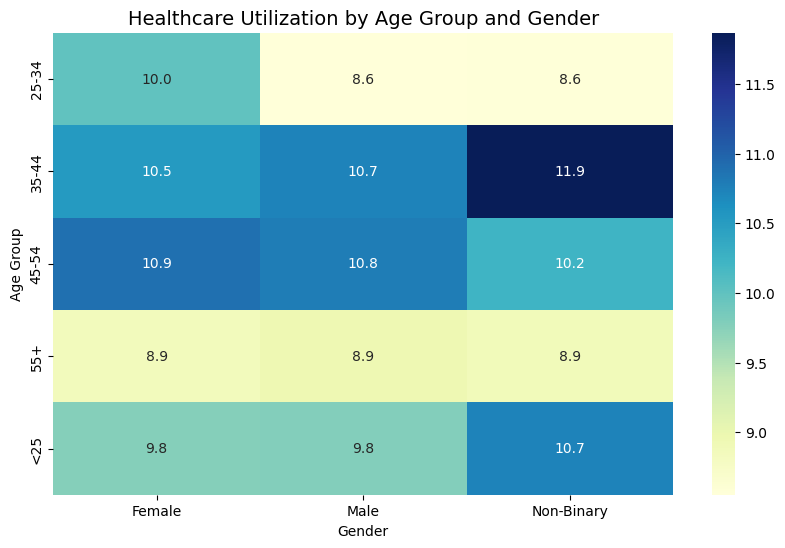

In [74]:

utilization_demo = benefits_data.pivot_table(values='HealthCareUtilization', index='AgeGroup', columns='Gender', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(utilization_demo, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Healthcare Utilization by Age Group and Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()


<Figure size 1200x700 with 0 Axes>

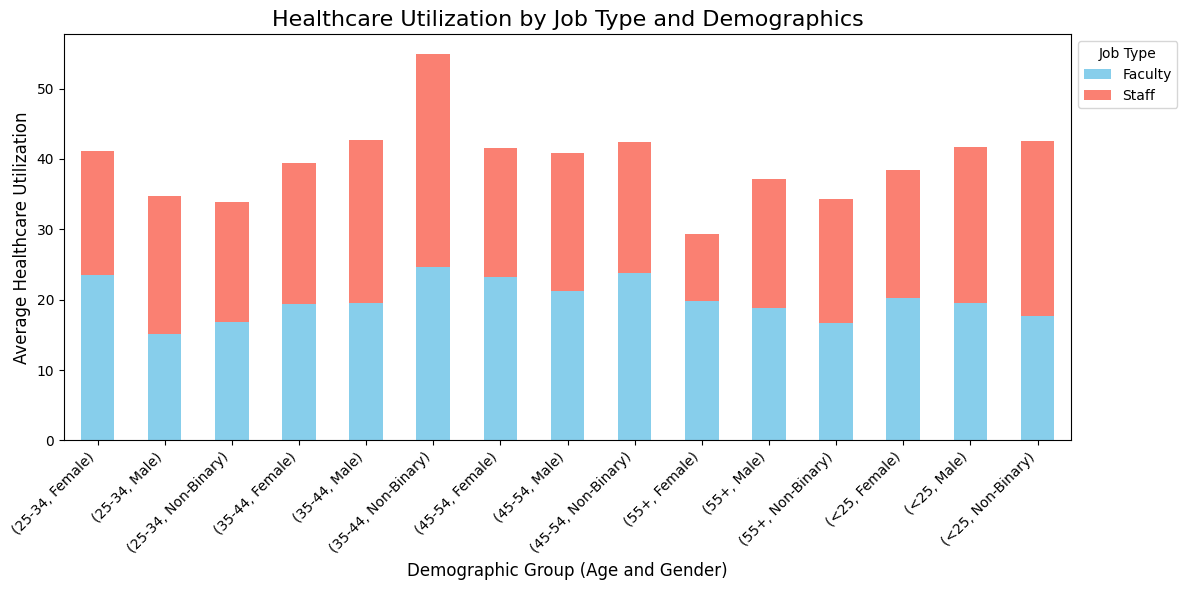

In [86]:

aggregation = benefits_data.groupby(['AgeGroup', 'Gender', 'JobType', 'Location']).agg(
    total_utilization=('HealthCareUtilization', 'sum'),
    count=('EmployeeID', 'count')
).reset_index()


aggregation['avg_utilization'] = aggregation['total_utilization'] / aggregation['count']

pivot_data = aggregation.pivot_table(index=['AgeGroup', 'Gender'], columns='JobType', values='avg_utilization', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 7))
pivot_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 6))

plt.title('Healthcare Utilization by Job Type and Demographics', fontsize=16)
plt.xlabel('Demographic Group (Age and Gender)', fontsize=12)
plt.ylabel('Average Healthcare Utilization', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

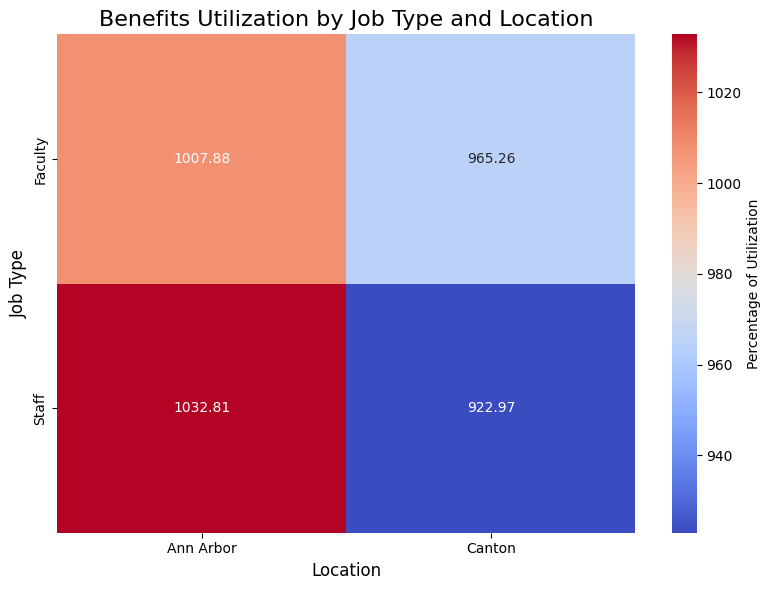

In [88]:
aggregation = benefits_data.groupby(['JobType', 'Location']).agg(
    total_utilization=('HealthCareUtilization', 'sum'),
    total_employees=('EmployeeID', 'count')
).reset_index()

# Calculate the percentage of employees utilizing healthcare benefits
aggregation['utilization_percentage'] = aggregation['total_utilization'] / aggregation['total_employees'] * 100

# Pivot the data for heatmap (using keyword arguments)
pivot_data = aggregation.pivot(index='JobType', columns='Location', values='utilization_percentage')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Percentage of Utilization'}, fmt='.2f')

# Adding titles and labels
plt.title('Benefits Utilization by Job Type and Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Job Type', fontsize=12)

plt.tight_layout()
plt.show()

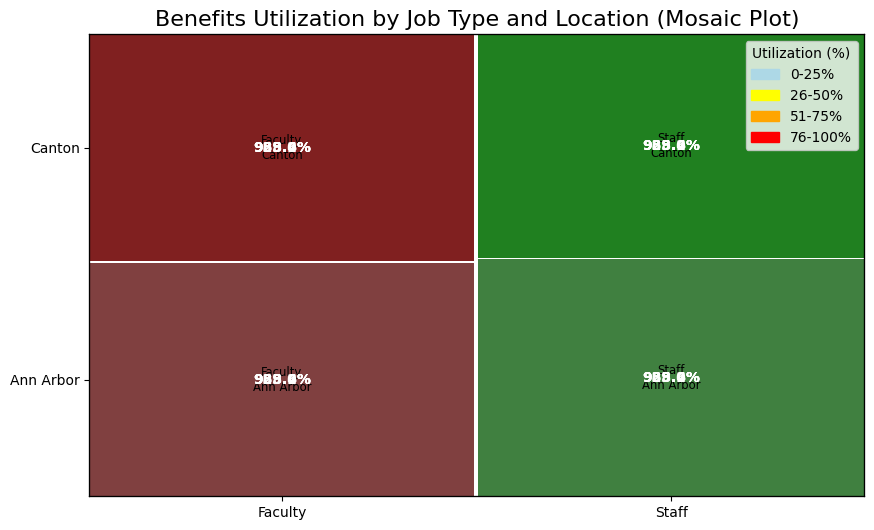

In [93]:
aggregation = benefits_data.groupby(['JobType', 'Location']).agg(
    total_utilization=('HealthCareUtilization', 'sum'),
    total_employees=('EmployeeID', 'count')
).reset_index()


aggregation['utilization_percentage'] = aggregation['total_utilization'] / aggregation['total_employees'] * 100

aggregation['utilization_group'] = pd.cut(aggregation['utilization_percentage'], bins=[0, 25, 50, 75, 100],
                                           labels=['0-25%', '26-50%', '51-75%', '76-100%'])

pivot_data = aggregation.pivot_table(
    index='JobType',
    columns='Location',
    values='utilization_percentage',
    aggfunc='mean'
).fillna(0)

mosaic_data = pivot_data.stack().to_dict()

fig, ax = plt.subplots(figsize=(10, 6))
mosaic(mosaic_data, ax=ax)


for patch in ax.patches:
    x0, y0, width, height = patch.get_bbox().bounds
    center_x = x0 + width / 2
    center_y = y0 + height / 2

    for (job_type, location), value in mosaic_data.items():
        utilization_pct = aggregation.loc[
            (aggregation['JobType'] == job_type) & (aggregation['Location'] == location),
            'utilization_percentage'
        ].values[0]

        ax.text(
            center_x, center_y, f'{utilization_pct:.1f}%',
            ha='center', va='center', fontsize=10, color='white', fontweight='bold'
        )

legend_labels = ['0-25%', '26-50%', '51-75%', '76-100%']
legend_colors = ['lightblue', 'yellow', 'orange', 'red']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

plt.legend(handles=legend_patches, title='Utilization (%)', loc='upper right')


plt.title('Benefits Utilization by Job Type and Location (Mosaic Plot)', fontsize=16)

plt.show()

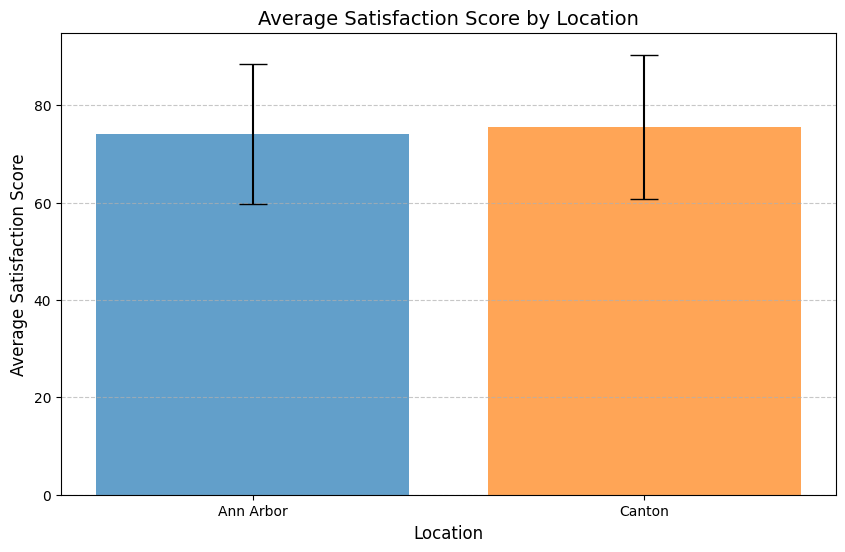

In [77]:
# Group data by Location for satisfaction score
satisfaction_by_location = benefits_data.groupby('Location')['SatisfactionScore'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))
plt.bar(
    satisfaction_by_location['Location'],
    satisfaction_by_location['mean'],
    yerr=satisfaction_by_location['std'],
    capsize=10,
    color=['#1f77b4', '#ff7f0e'],
    alpha=0.7
)


plt.title('Average Satisfaction Score by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<ipython-input-94-1ebe7b73dc1c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


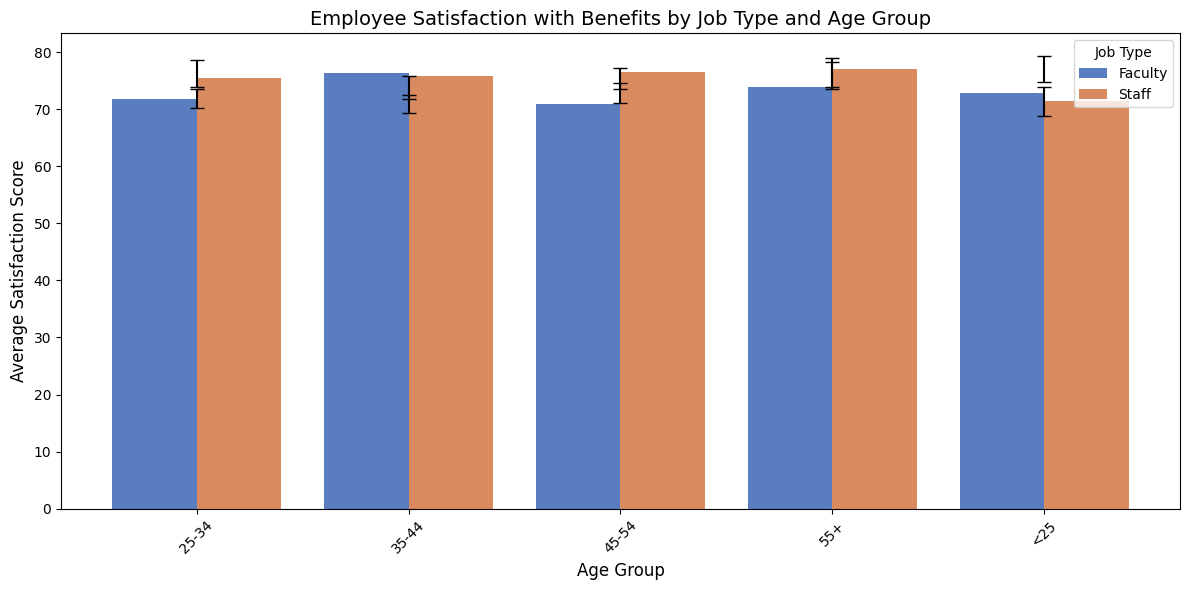

In [94]:
satisfaction_summary = benefits_data.groupby(['JobType', 'AgeGroup']).agg(
    mean_satisfaction=('SatisfactionScore', 'mean'),
    std_satisfaction=('SatisfactionScore', 'std'),
    count=('SatisfactionScore', 'size')
).reset_index()

# Calculate the error bars (standard error of the mean)
satisfaction_summary['error'] = satisfaction_summary['std_satisfaction'] / np.sqrt(satisfaction_summary['count'])

# Plotting the Bar Chart with Error Bars
plt.figure(figsize=(12, 6))
sns.barplot(
    data=satisfaction_summary,
    x='AgeGroup',
    y='mean_satisfaction',
    hue='JobType',
    ci=None,  # Disabling internal confidence interval
    palette='muted'
)

# Adding error bars
for i in range(len(satisfaction_summary)):
    plt.errorbar(
        x=i // 2,  # Adjusting for the hue (JobType), assuming each "AgeGroup" has 2 bars (for Faculty/Staff)
        y=satisfaction_summary['mean_satisfaction'].iloc[i],
        yerr=satisfaction_summary['error'].iloc[i],
        fmt='none',
        c='black',
        capsize=5
    )

# Titles and Labels
plt.title('Employee Satisfaction with Benefits by Job Type and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.legend(title='Job Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

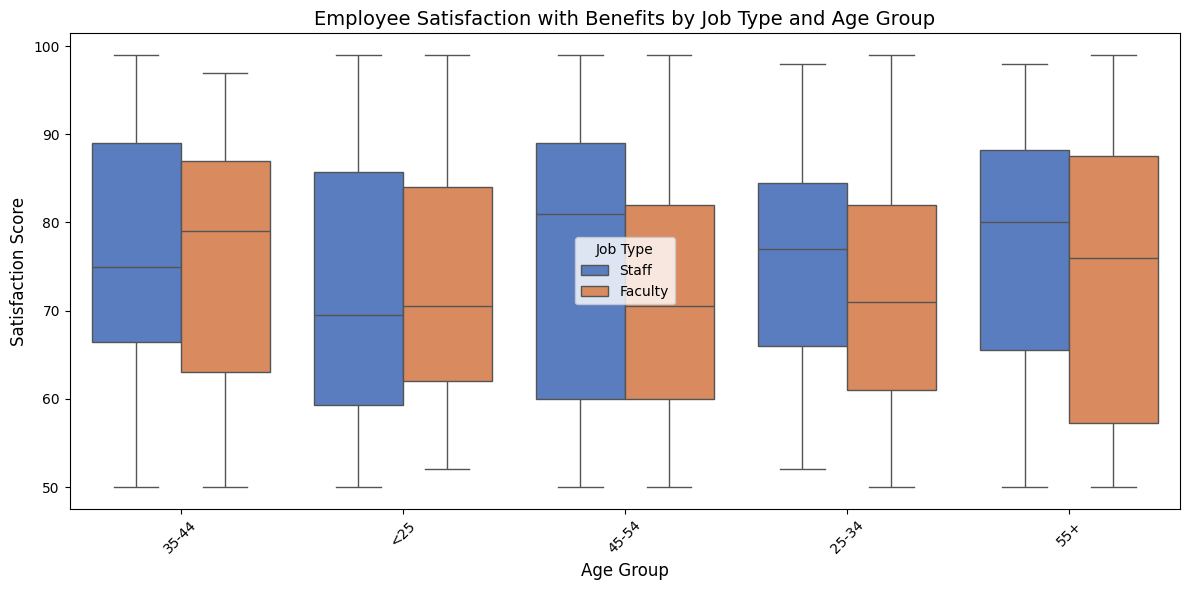

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=benefits_data,
    x='AgeGroup',
    y='SatisfactionScore',
    hue='JobType',
    palette='muted'
)


plt.title('Employee Satisfaction with Benefits by Job Type and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.legend(title='Job Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

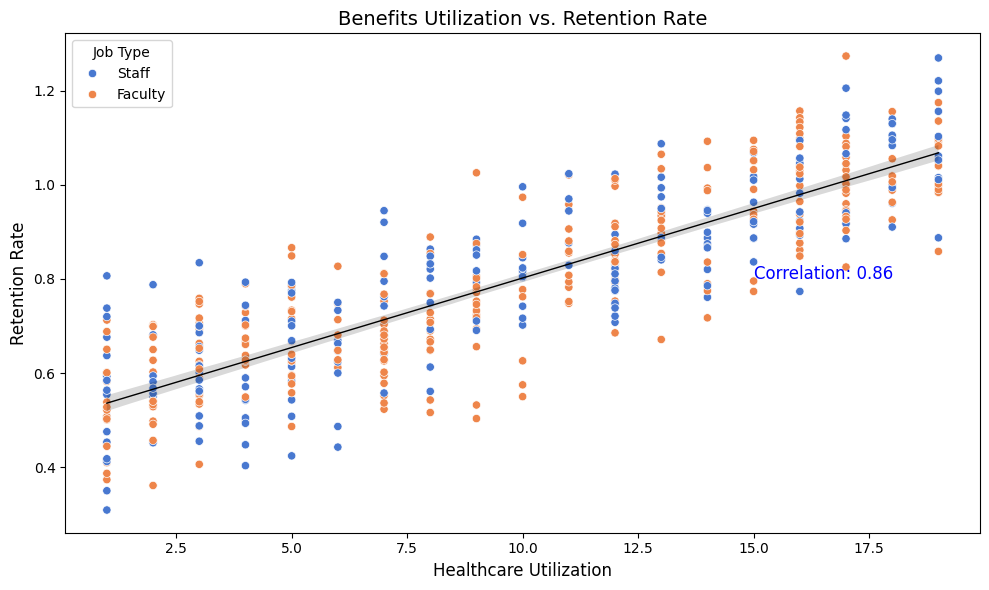

In [98]:
benefits_data['RetentionRate'] = 0.5 + (benefits_data['HealthCareUtilization'] * 0.03) + np.random.normal(0, 0.1, 500)
benefits_data['ProductivityScore'] = 60 + (benefits_data['HealthCareUtilization'] * 0.5) + np.random.normal(0, 5, 500)


plt.figure(figsize=(10, 6))


sns.scatterplot(data=benefits_data, x='HealthCareUtilization', y='RetentionRate', hue='JobType', palette='muted')


sns.regplot(data=benefits_data, x='HealthCareUtilization', y='RetentionRate', scatter=False, color='black', line_kws={"linewidth": 1})


plt.title('Benefits Utilization vs. Retention Rate', fontsize=14)
plt.xlabel('Healthcare Utilization', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)


correlation = benefits_data[['HealthCareUtilization', 'RetentionRate']].corr().iloc[0, 1]
plt.text(15, 0.8, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')


plt.tight_layout()
plt.legend(title='Job Type')
plt.show()

X-Axis (Healthcare Utilization): This represents how much employees utilize their healthcare benefits (e.g., the number of healthcare visits).
Y-Axis (Retention Rate): This represents the simulated retention rate (higher value indicates higher retention).
Points: Each point represents an employee. Points are colored by Job Type (e.g., Faculty vs. Staff).
Trend Line: The regression line shows the overall trend between healthcare utilization and retention rate. A positive slope would suggest that more healthcare utilization correlates with higher retention rates.
Correlation Coefficient: The correlation between benefits utilization and retention rate is calculated and displayed on the plot.


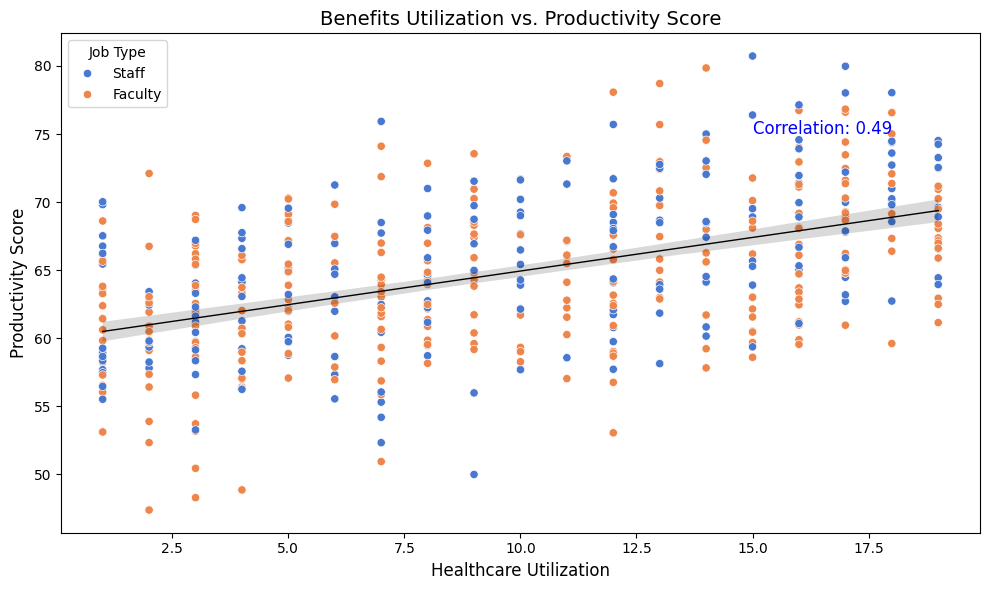

In [99]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=benefits_data, x='HealthCareUtilization', y='ProductivityScore', hue='JobType', palette='muted')


sns.regplot(data=benefits_data, x='HealthCareUtilization', y='ProductivityScore', scatter=False, color='black', line_kws={"linewidth": 1})


plt.title('Benefits Utilization vs. Productivity Score', fontsize=14)
plt.xlabel('Healthcare Utilization', fontsize=12)
plt.ylabel('Productivity Score', fontsize=12)


correlation_productivity = benefits_data[['HealthCareUtilization', 'ProductivityScore']].corr().iloc[0, 1]
plt.text(15, 75, f'Correlation: {correlation_productivity:.2f}', fontsize=12, color='blue')


plt.tight_layout()
plt.legend(title='Job Type')
plt.show()


In [60]:
!pip install streamlit
!pip install pyngrok

In [66]:
from pyngrok import ngrok
!streamlit run /content/app.py & echo "y" | npx ngrok http 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.152.39:8501

  Stopping...
^C


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
